In [1]:
from family_network_model import *
from matplotlib import pyplot as plt
import networkx as nx
import ast
import pickle
from get_model_parameters import *
import ast

In [2]:
# infinite_distances dictionary shows 'name' of all networks in data
with open('./UnionDistances/infinite_distances.txt') as f:
    inf_distances = f.readline()
infinite_distances = ast.literal_eval(inf_distances)
infinite_distances.keys()

dict_keys(['achuar_huasaga_chankuap', 'achuar_pastaza', 'ainu_1880_as01', 'alyawarra_1971_au01', 'ammonni', 'ancien_regime', 'angmagsalik_1884_nu01', 'anuta_1972', 'apache_1932_nd01', 'apache_1935_nd02', 'apache_1936_nd03', 'arara', 'arawete', 'ayd_nl_yoruk_2005', 'baruya', 'bwa_slam_biogsurvey', 'candoshi', 'charlevoix', 'chenchu_1940_as02', 'chuukese_1947_1940', 'cocama-cocamilla', 'copper_1922_nu10', 'dogon-konsogu-donyu', 'dogon_boni', 'dogrib_1911_25_59_nd04', 'duu_rea', 'ebrei', 'eyak_1890', 'family', 'feistritz_am_gael_1990', 'gundangborn_1948_au02', 'hare_1956_nd05', 'hatfields_and_mccoys', 'igluligmiut_1921_nu05', 'igluligmiut_1949_nu06', 'igluligmiut_1960-61_nu08', 'igluligmiut_1961_nu07', 'jie', 'kaingang', 'kel_owey', 'kelkummer', 'kodiak', 'konkama_1931_44_51_eu02', 'konkama_1951_eu01', 'labrador_inuit_1776_nu02', 'lainiovouma_1952_eu03', 'manus_1929', 'mbuti_forest_1957_af02', 'mbuti_village_1957_af03', 'melombo', 'miwuyt_1967_au03', 'mowanjum-kalumburu', 'netsilik_1922_n

In [3]:
# New file with a dictionary of other data parameters--created to make run_model.py run faster
with open('./UnionDistances/other_parameters.txt') as f:
    params = f.readline()
data_parameters = ast.literal_eval(params)

# Note: data_parameters[name][0] = number of marriage edges
#       data_parameters[name][1] = probability of marriage
#       data_parameters[name][2] = probability of nonconnected marriage
#       data_parameters[name][3] = total number of nodes in network

## New and improved way to run model

In [4]:
# Get data--ignore the output that says "Graph failed: ./Original_Sources/.DS_Store
                                       # Error: marriage edges from ./Original_Sources/kinsources-warao-oregraph.paj
                                       # Graph failed: ./Original_Sources/kinsources-warao-oregraph.paj"

# name of chosen network--see infinite_distances dictionary for help with names of networks (run second cell to see)
name = 'achuar_pastaza'

# get data--number of marriage edges, probability of marriage, probability of nonconnected marriage parameters
m_e, P, NCP = get_some_parameters(name)

# get number of infinite distance unions
with open('./UnionDistances/infinite_distances.txt') as f:
    inf_distances = f.readline()
infinite_distances = ast.literal_eval(inf_distances)
# save number of infinite distance unions as a parameter
inf_dis = infinite_distances[name]

# marriage distance data of chosen network
with open('./UnionDistances/{}_distances.txt'.format(name)) as f:
    nx_dis = f.readline()
# network's marriage distances w/o infinite distances distribution
nx_distances = ast.literal_eval(nx_dis)

# number of children data of chosen network
with open('./ChildrenNumber/{}_children.txt'.format(name)) as f:
    nx_child = f.readline()
# network's number of children distribution
nx_children = ast.literal_eval(nx_child)

Error: marriage edges from ./Original_Sources/kinsources-warao-oregraph.paj
Graph failed: ./Original_Sources/kinsources-warao-oregraph.paj


In [15]:
# initialize parameters
name = 'achuar_pastaza'
n = 99   # n+1 = number of people in initial network
gen = 7  # gen+2 = total number of generations in network (use small number of generations for testing)
name = name + '_test' # change 'test' every time you run model if you want to save & differentiate the output

marriage_dist = nx_distances
children_dist = nx_children
p = P
ncp = NCP
infdis = round((inf_dis/m_e - (NCP/2))*m_e)


# run model
G, D, unions, children, infdis, output_path = human_family_network(n, gen, marriage_dist, p, ncp, infdis, children_dist, name)

# visualize resulting network
# nx.draw(G, with_labels=True, font_weight='bold')

generation:  0
generation:  1
generation:  2
generation:  3
generation:  4
generation:  5
generation:  6
generation:  7
Last generation:  8
4706


KeyError (add_marriage_edges line 80, dis_probs.append): 33, 32, (30s generally)

## Analyze Model

In [6]:
def model_marriage_dis(unions, D):
    """Find distances of marriages formed in modeled network--used to compare to original data of distances
    Parameters:
                unions (list): list of all unions in modeled network
                D (array): matrix of distances between all nodes in modeled network
    Returns:
                distances (list): list of distances to marriage in modeled network
    
    """

    distances = []

    for pair in unions:
        p1, p2 = pair
        distances.append(D[p1][p2])
        
    return distances

### Visualize distribution of union distances at each generation

Generation : 0
Number of nodes:  100
Number of marriages:  0
Number of infinite marriages:  0


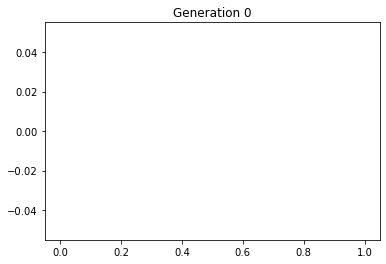

Generation : 1
Number of nodes:  268
Number of marriages:  67
Number of infinite marriages:  54


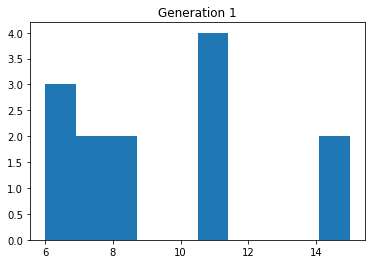

Generation : 2
Number of nodes:  498
Number of marriages:  154
Number of infinite marriages:  115


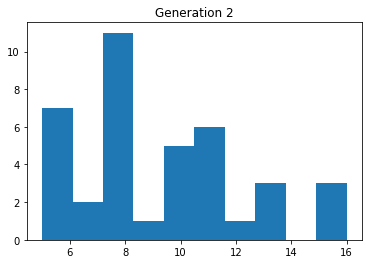

Generation : 3
Number of nodes:  820
Number of marriages:  284
Number of infinite marriages:  206


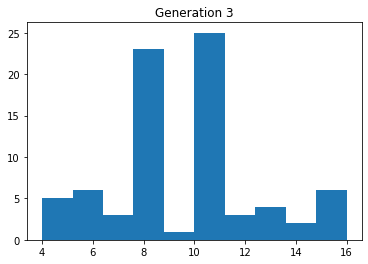

Generation : 4
Number of nodes:  1242
Number of marriages:  461
Number of infinite marriages:  330


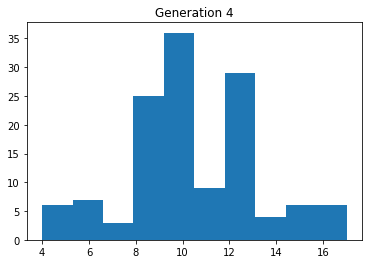

Generation : 5
Number of nodes:  1797
Number of marriages:  690
Number of infinite marriages:  490


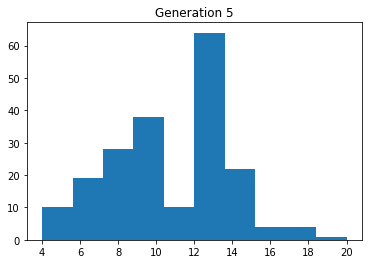

Generation : 6
Number of nodes:  2540
Number of marriages:  994
Number of infinite marriages:  703


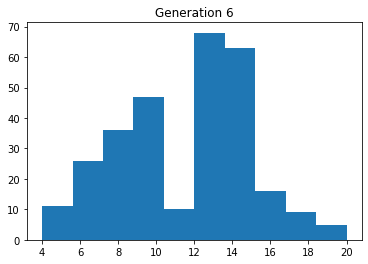

Generation : 7
Number of nodes:  3501
Number of marriages:  1401
Number of infinite marriages:  988


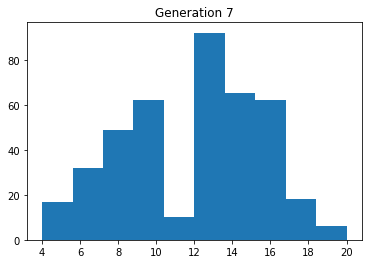

Generation : 8
Number of nodes:  4706
Number of marriages:  1920
Number of infinite marriages:  1352


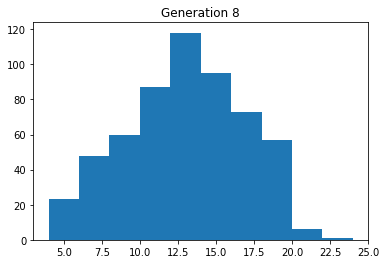

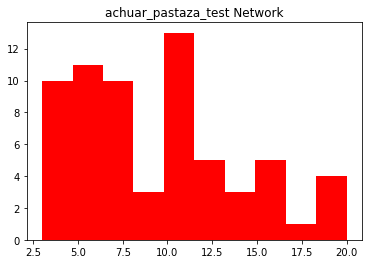

In [16]:
for i in range(0, gen+2):
    print("Generation :", i)

    # read in files
    gpickle_file = nx.read_gpickle("{}/{}_G{}.gpickle".format(output_path, name,i))
    D_file = np.load("{}/{}_D{}.npy".format(output_path, name,i))
    with open ('{}/{}_U{}'.format(output_path, name,i), 'rb') as fup:
        unions_file = pickle.load(fup)
    with open('{}/{}_C{}'.format(output_path, name,i), 'rb') as fcp:
        children_file = pickle.load(fcp)

    # assign names 
    G = gpickle_file
    unions = unions_file
    D = D_file
    children = children_file

    # network size
    print("Number of nodes: ", len(G.nodes))

    # visualize distances
    distances = model_marriage_dis(unions, D)
    d = np.array(distances)
    mask1 = d < 100
    mask2 = d >= 100
    print("Number of marriages: ", len(unions))
    print("Number of infinite marriages: ", len(d[mask2]))
    
    plt.hist(d[mask1])
    plt.title("Generation {}".format(i))
    plt.show()

plt.hist(nx_distances, color='r')
plt.title("{} Network".format(name))
plt.show()

### Visualize distribution of number of children at each generation

Generation : 1
Number of nodes:  268


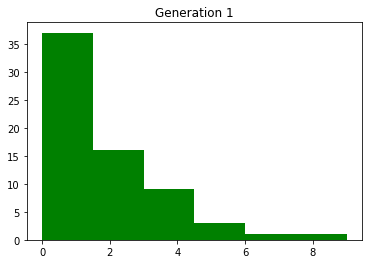

Generation : 2
Number of nodes:  498


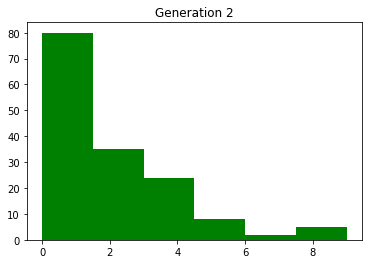

Generation : 3
Number of nodes:  820


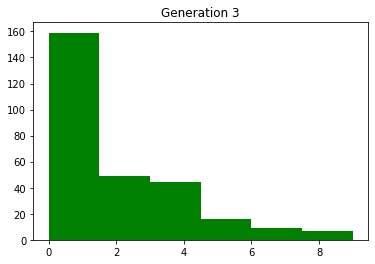

Generation : 4
Number of nodes:  1242


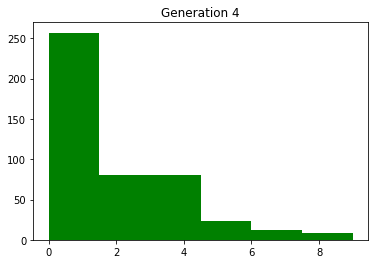

Generation : 5
Number of nodes:  1797


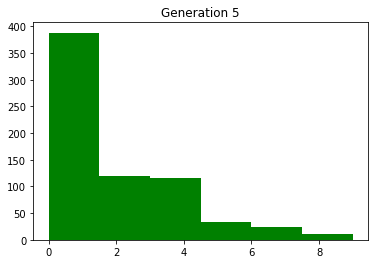

Generation : 6
Number of nodes:  2540


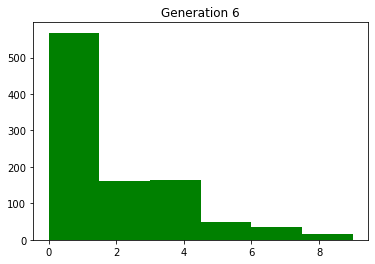

Generation : 7
Number of nodes:  3501


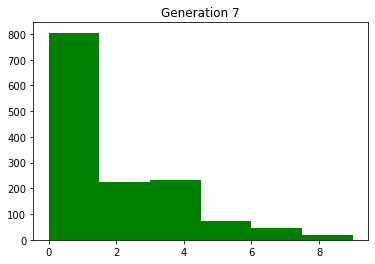

Generation : 8
Number of nodes:  4706


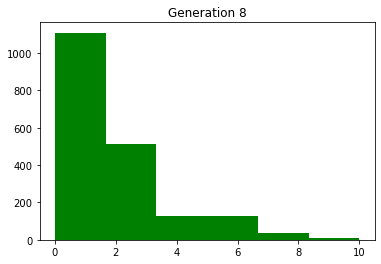

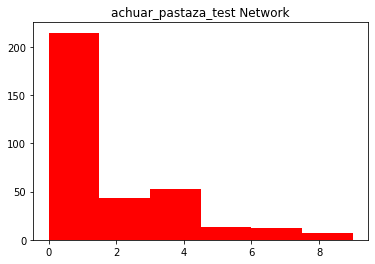

In [17]:
for i in range(1, gen+2):
    print("Generation :", i)

    # read in files
    gpickle_file = nx.read_gpickle("{}/{}_G{}.gpickle".format(output_path, name,i))
    D_file = np.load("{}/{}_D{}.npy".format(output_path, name,i))
    with open ('{}/{}_U{}'.format(output_path, name,i), 'rb') as fup:
        unions_file = pickle.load(fup)
    with open('{}/{}_C{}'.format(output_path, name,i), 'rb') as fcp:
        children_file = pickle.load(fcp)

    # assign names 
    G = gpickle_file
    unions = unions_file
    D = D_file
    children = children_file

    # network size
    print("Number of nodes: ", len(G.nodes))

    plt.hist(children, color='g', bins=6)
    plt.title("Generation {}".format(i))
    plt.show()

plt.hist(nx_children, color='r', bins=6)
plt.title("{} Network".format(name))
plt.show()

### Visualize largest connected component of network at each generation

Generation : 0


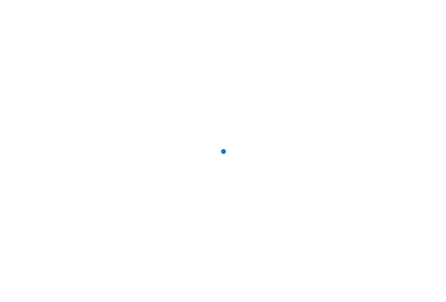

Generation : 1


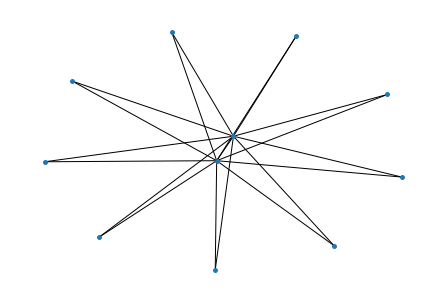

Generation : 2


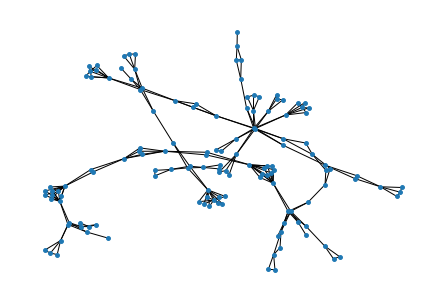

Generation : 3


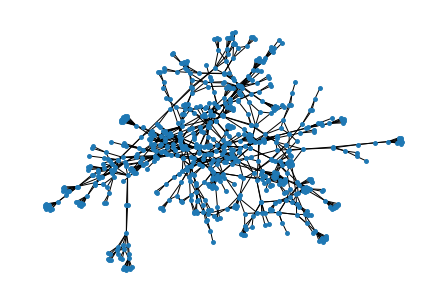

Generation : 4


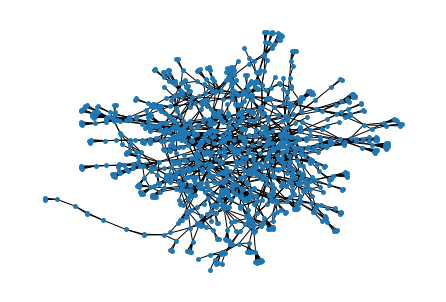

Generation : 5


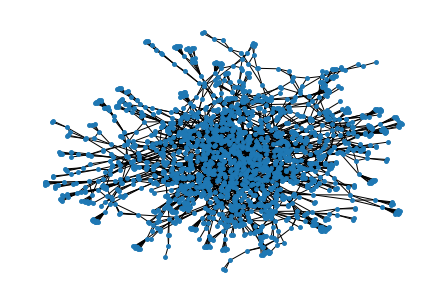

Generation : 6


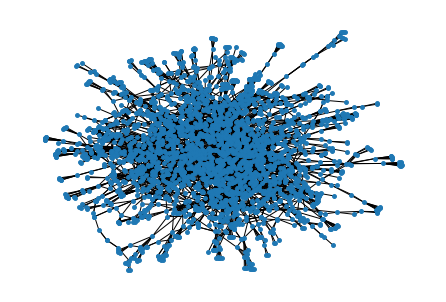

Generation : 7


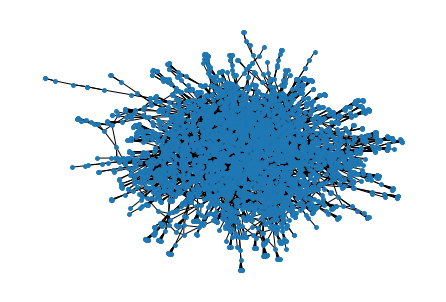

Generation : 8


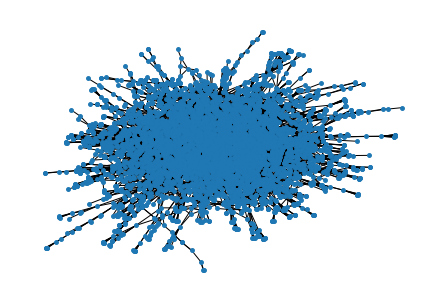

In [18]:
# Visualize largest connected component

for i in range(gen+2):
    print("Generation :", i)

    # read in file
    gpickle_file = nx.read_gpickle("{}/{}_G{}.gpickle".format(output_path,name,i))
    G = gpickle_file
    
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    nx.draw(G0, node_size=15)
    plt.show()